# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline

In [15]:
from sklearn import datasets

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
 
kmeans = KMeans(n_clusters=8)
km_clus = kmeans.fit(X)
y1_pred= km_clus.predict(X)

print(f'KMeans Model Silhouette Score: {silhouette_score(X, y1_pred)}')

KMeans Model Silhouette Score: 0.5369954815914458


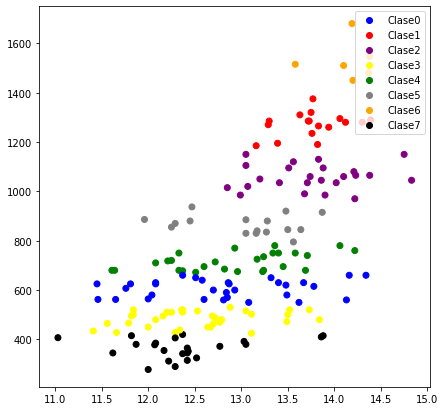

In [30]:
plt.subplots(figsize = (7,7))
colors = np.array(['blue','red',"purple","yellow","green","gray","orange","black"])

legend_e = [Line2D([0],[0], color = c, marker ='o', linestyle = '', label = f'Clase{i}') for i,c in enumerate(colors)]
plt.scatter(X.iloc[:,0], X.iloc[:,12],  color = colors[y1_pred])
plt.legend(handles = legend_e, loc = 'upper right')

## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [31]:
kmeans = KMeans(n_clusters=5)
km_clus = kmeans.fit(X)
y2_pred= km_clus.predict(X)

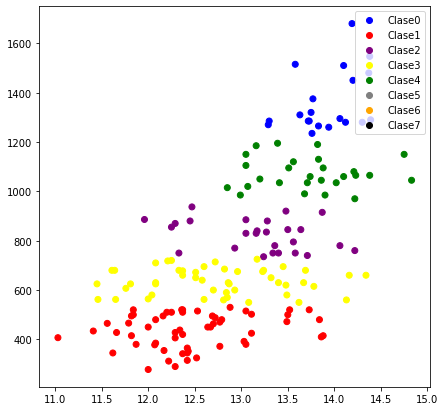

In [32]:
plt.subplots(figsize = (7,7))
colors = np.array(['blue','red',"purple","yellow","green","gray","orange","black"])

legend_e = [Line2D([0],[0], color = c, marker ='o', linestyle = '', label = f'Clase{i}') for i,c in enumerate(colors)]
plt.scatter(X.iloc[:,0], X.iloc[:,12],  color = colors[y2_pred])
plt.legend(handles = legend_e, loc = 'upper right')

## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [34]:
kmeans = KMeans(n_clusters=3)
km_clus = kmeans.fit(X)
y3_pred= km_clus.predict(X)

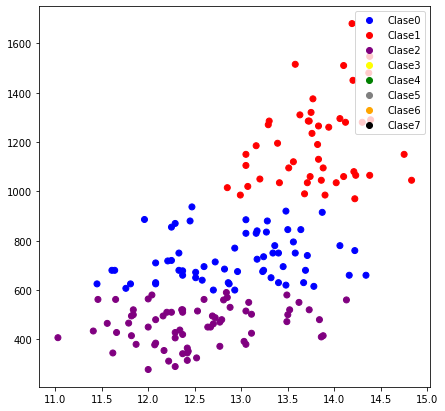

In [35]:
plt.subplots(figsize = (7,7))
colors = np.array(['blue','red',"purple","yellow","green","gray","orange","black"])

legend_e = [Line2D([0],[0], color = c, marker ='o', linestyle = '', label = f'Clase{i}') for i,c in enumerate(colors)]
plt.scatter(X.iloc[:,0], X.iloc[:,12],  color = colors[y3_pred])
plt.legend(handles = legend_e, loc = 'upper right')

## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

In [38]:
from yellowbrick.cluster import KElbowVisualizer


C:\Users\Tomaas\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


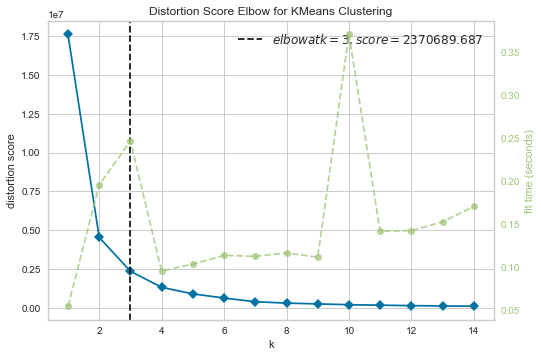

In [41]:
modelo = KMeans()

visual = KElbowVisualizer(modelo, k = (1,15))

visual.fit(X)

visual.poof();


In [42]:
# Se ve que la curva más pronunciada es en el punto 2, pero en el modelo nos marca qu el mejor número de clusters es 3


## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

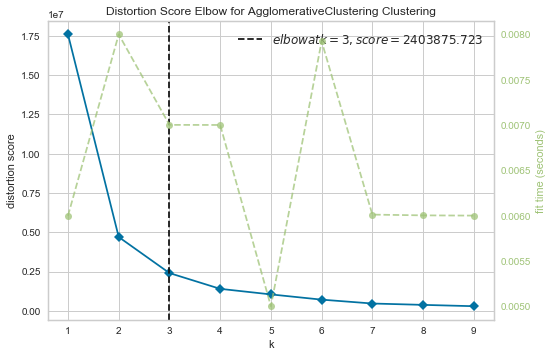

In [45]:
from sklearn.cluster import AgglomerativeClustering

modelo = AgglomerativeClustering()

visual = KElbowVisualizer(modelo, k = (1,10))

visual.fit(X)

visual.poof();


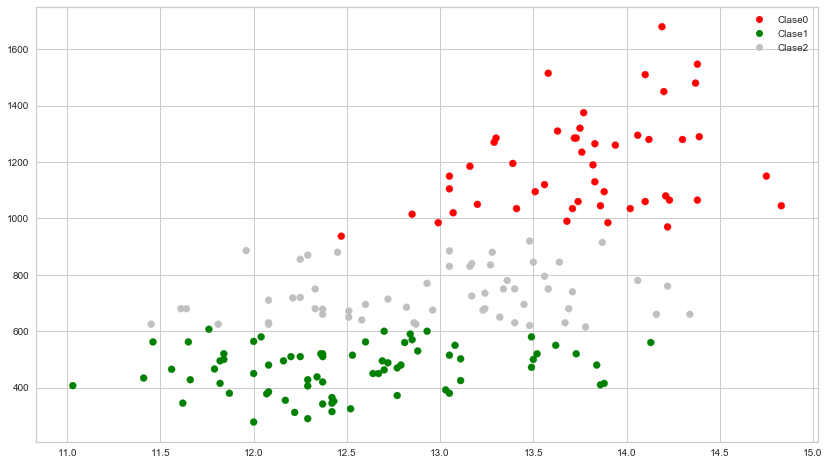

In [71]:
single = AgglomerativeClustering(n_clusters=3)
single.fit(X)
y4_pred = single.labels_
y4_pred
plt.subplots(figsize=(14,8))
colors = np.array(['red', 'green','silver'])

legend_e = [Line2D([0],[0], color = c, marker ='o', linestyle = '', label = f'Clase{i}') for i,c in enumerate(colors)]

plt.scatter(X.iloc[:,0], X.iloc[:,12], color= colors[y4_pred])
plt.legend(handles = legend_e, loc = 'upper right')


## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

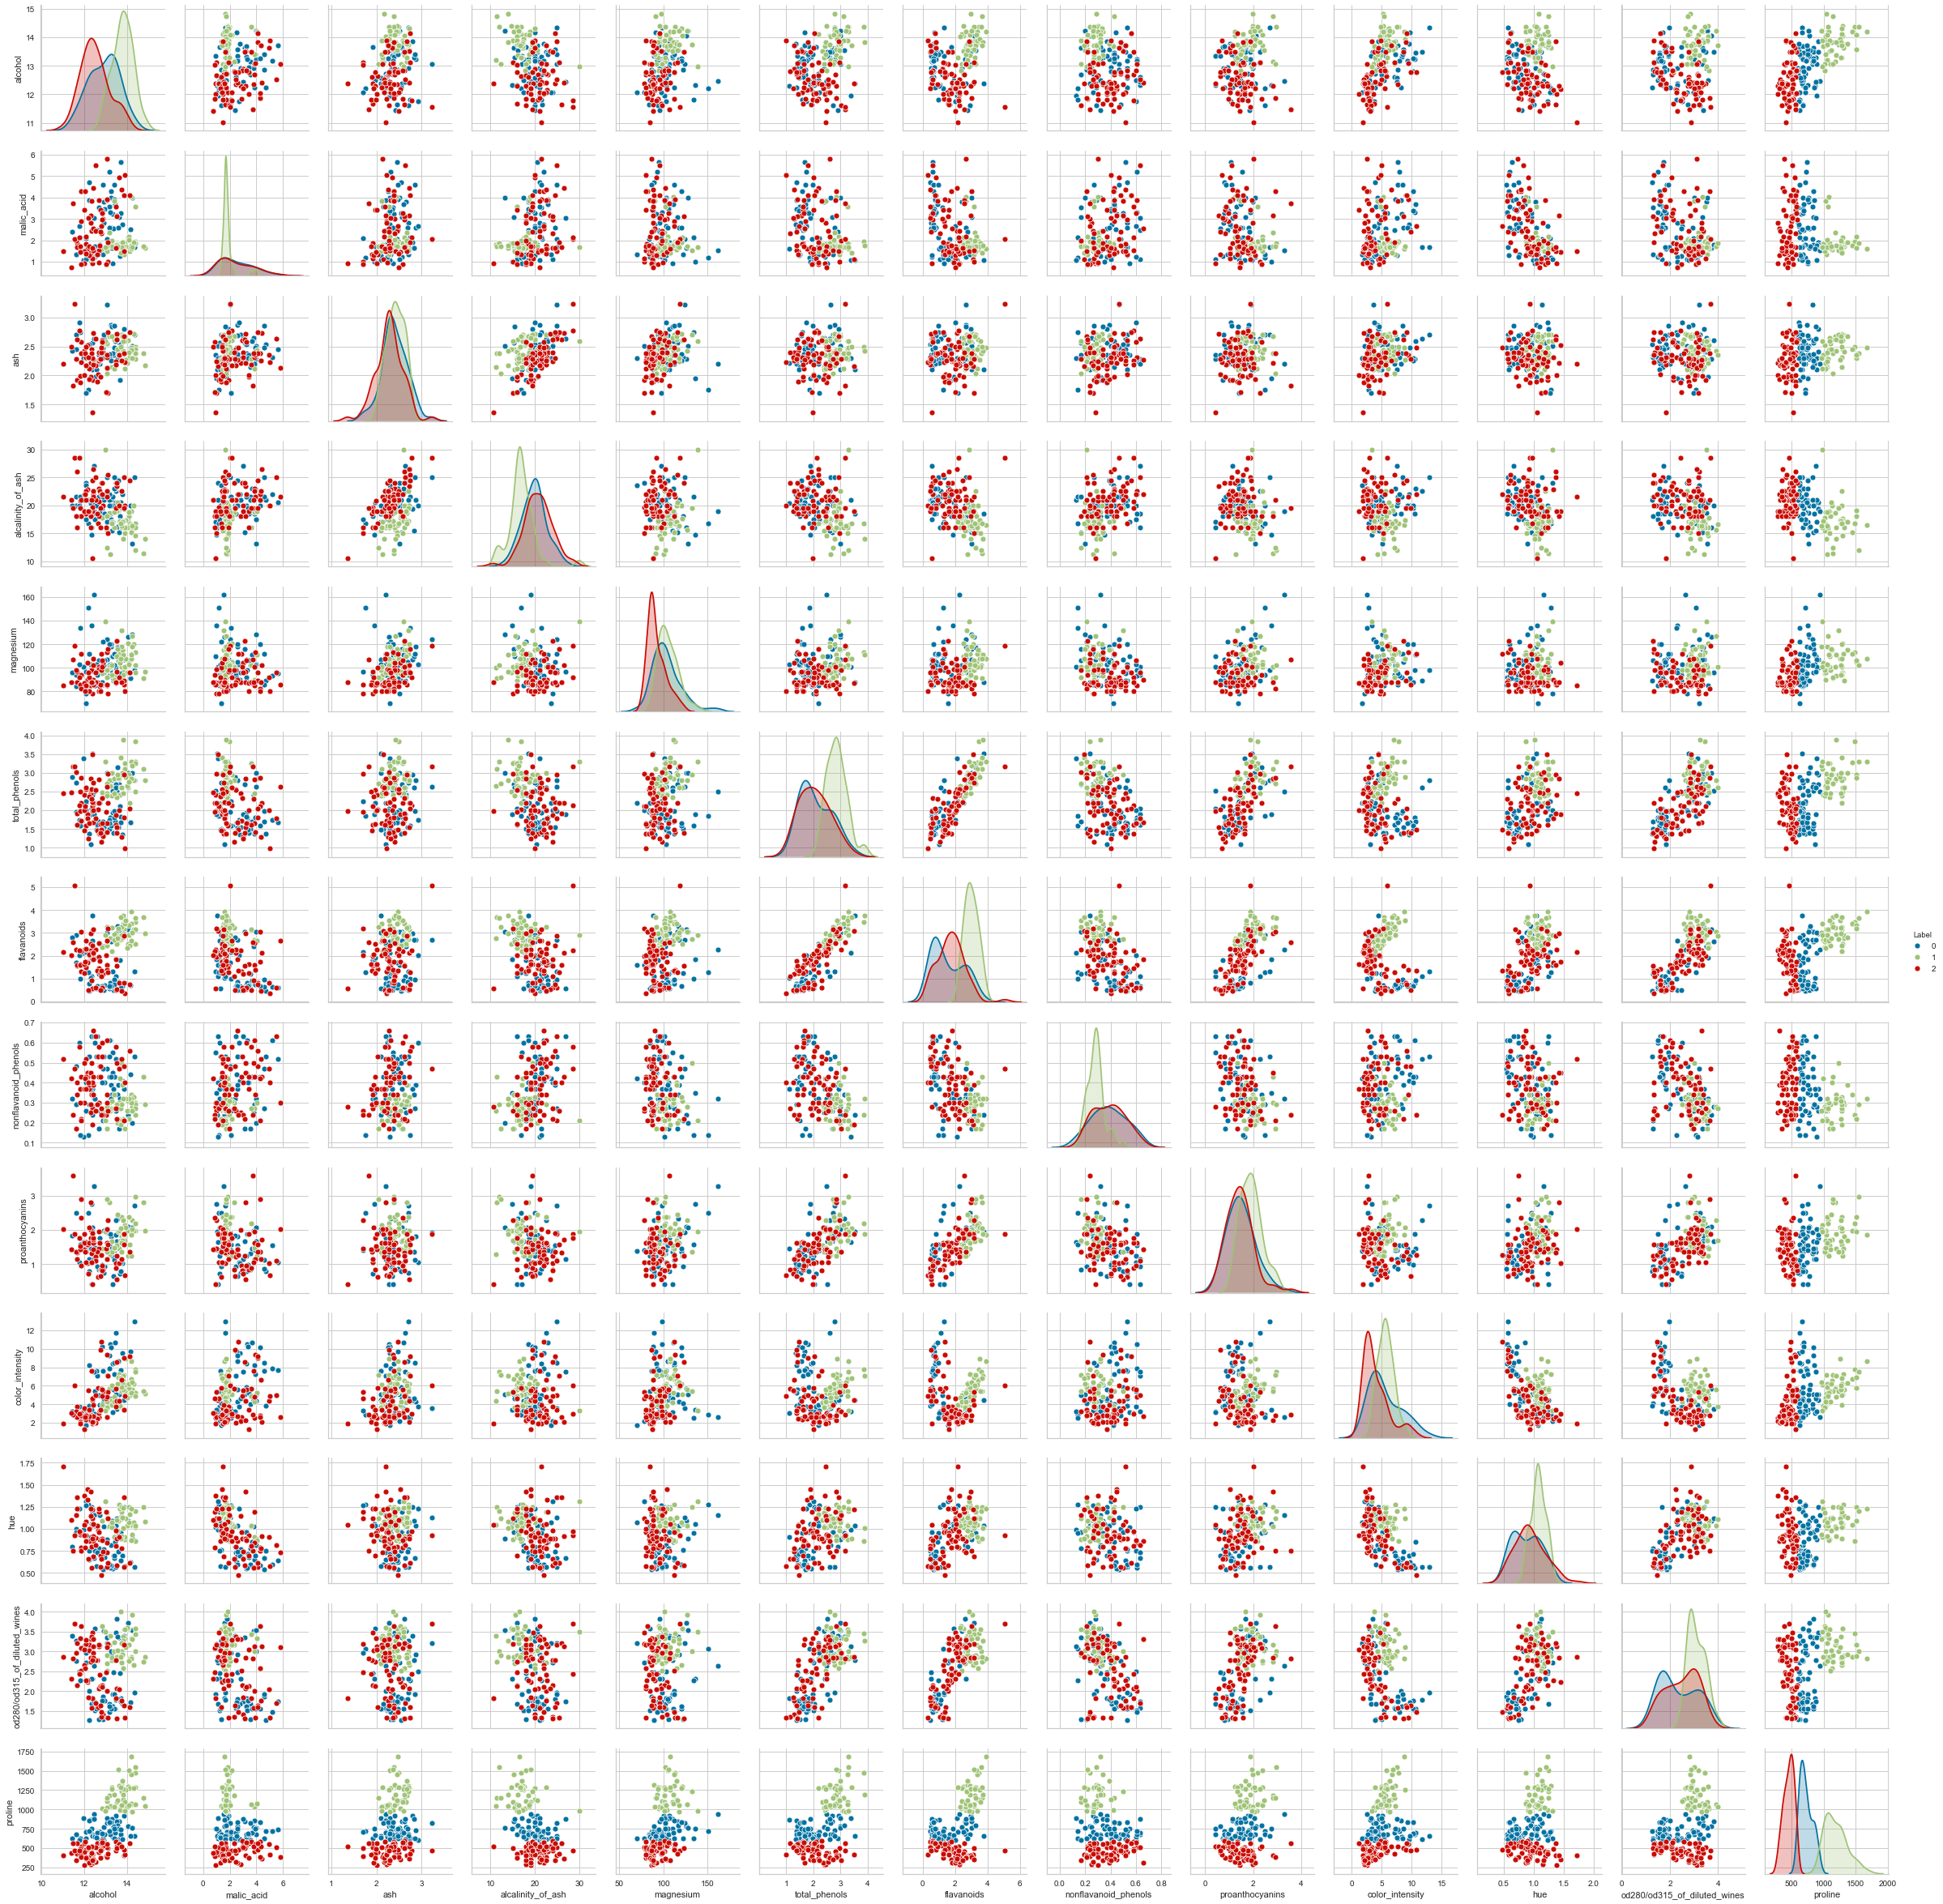

In [48]:
import seaborn as sns 

X["Label"] = y3_pred

sns.pairplot(X, hue='Label');

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

In [49]:
from sklearn.decomposition import PCA

In [51]:
pca = PCA(n_components = 2)
transform = pca.fit_transform(X)
transform = pd.DataFrame(transform)
transform

,0,1
0,318.562840,21.485963
1,303.097288,-5.368185
2,438.060924,-6.542579
3,733.239762,0.182551
4,-11.570310,18.502579
...,...,...
173,-6.979096,-4.526310
174,3.132714,2.349216
175,88.459135,18.787590
176,93.457300,18.682029


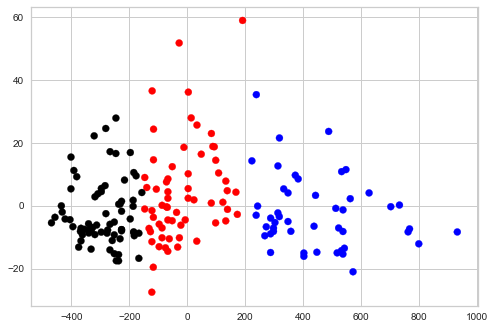

In [68]:
colors = np.array(['blue', 'red',"black"])
plt.scatter(transform[0], transform[1], color = colors[y2_pred])


## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.

In [61]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2).fit_transform(X)

In [62]:
tsne = pd.DataFrame(tsne, columns = ["Componente 1", "Componente 2"])

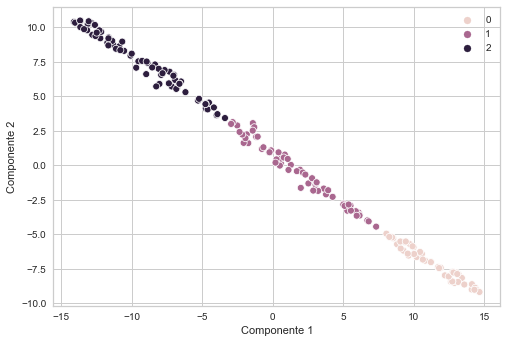

In [69]:
sns.scatterplot(data = tsne, x = "Componente 1", y = "Componente 2", hue = y2_pred)